In [ ]:
#import numpy as np
#with open('small_input.txt') as f:
#    input_lines = np.array(f.readlines())
#input_lines[:10]

In [ ]:
import numpy as np
with open('editpad.org.txt') as f:
    input_lines = f.readlines()

input_lines = np.array([[a.replace('\n','')] for a in input_lines ])
input_lines = input_lines[0:140]

input_lines = [[*a[0]] for a in input_lines]

input_lines = np.vectorize(repl_dict.get)(input_lines)


In [ ]:
#input_lines = [list(a) for a in input_lines]
#input_lines[0][:10]

['L', 'J', '-', 'L', '7', 'F', '7', '.', '.', '-']

In [ ]:
input_lines=np.array([['7-F7-'],
                      ['.FJ|7'],
                      ['SJLL7'],
                      ['|F--J'],
                      ['LJ.LJ']])
input_lines

array([['7-F7-'],
       ['.FJ|7'],
       ['SJLL7'],
       ['|F--J'],
       ['LJ.LJ']], dtype='<U5')

In [ ]:
input_lines = [[*a[0]] for a in input_lines]
input_lines

[['7', '-', 'F', '7', '-'],
 ['.', 'F', 'J', '|', '7'],
 ['S', 'J', 'L', 'L', '7'],
 ['|', 'F', '-', '-', 'J'],
 ['L', 'J', '.', 'L', 'J']]

In [ ]:
repl_dict = {'.':' ',
             '|':'|',
             '-':'-',
             'S':'O',
             'L':'L',
             'F':'F',
             'J':'J',
             '7':'7'}

In [ ]:
input_lines = np.vectorize(repl_dict.get)(input_lines)
input_lines

array([['7', '-', 'F', '7', '-'],
       [' ', 'F', 'J', '|', '7'],
       ['O', 'J', 'L', 'L', '7'],
       ['|', 'F', '-', '-', 'J'],
       ['L', 'J', ' ', 'L', 'J']], dtype='<U1')

In [ ]:
coor_start = np.where(input_lines=='O')
coor_start = (coor_start[0][0],coor_start[1][0])
coor_start

(62, 111)

In [ ]:
input_lines[60:64,109:113]

array([['F', '7', 'L', '|'],
       ['J', 'L', '7', '|'],
       ['-', '-', 'O', '|'],
       ['-', '-', '7', 'L']], dtype='<U1')

In [ ]:
import random
corr_beg_2 = [(62,110),(61,111)]
#corr_beg_2 = [(2,1),(3,0)]

corr_beg = random.choice(corr_beg_2)
corr_beg

(62, 110)

In [ ]:
input_lines[corr_beg]

'-'

In [ ]:
def next_step(arr,coors,prev_coors):
  if arr[coors]=='|':
    next_steps = [(coors[0]+1,coors[1]),(coors[0]-1,coors[1])]
  if arr[coors]=='-':
    next_steps = [(coors[0],coors[1]+1),(coors[0],coors[1]-1)]
  if arr[coors]=='L':
    next_steps = [(coors[0],coors[1]+1),(coors[0]-1,coors[1])]
  if arr[coors]=='F':
    next_steps = [(coors[0],coors[1]+1),(coors[0]+1,coors[1])]
  if arr[coors]=='J':
    next_steps = [(coors[0],coors[1]-1),(coors[0]-1,coors[1])]
  if arr[coors]=='7':
    next_steps = [(coors[0],coors[1]-1),(coors[0]+1,coors[1])]

  next_steps.remove(prev_coors)

  return(next_steps)

In [ ]:
coor_list = []
coor_list.append(coor_start)
coor_list.append(corr_beg)
print(coor_list)

[(62, 111), (62, 110)]


In [ ]:
while coor_list[-1]!= coor_list[0]:

  for index, elem in enumerate(coor_list):

    curr = coor_list [index+1]
    prev = coor_list[index]
    step = next_step(input_lines,curr,prev)[0]
    #print(index,prev,curr,step)
    #print(index,elem)
    coor_list.append(step)


In [ ]:
print('The answer is: ',(len(coor_list)-1)/2)

The answer is:  6733.0


In [ ]:
from matplotlib import pyplot as plt

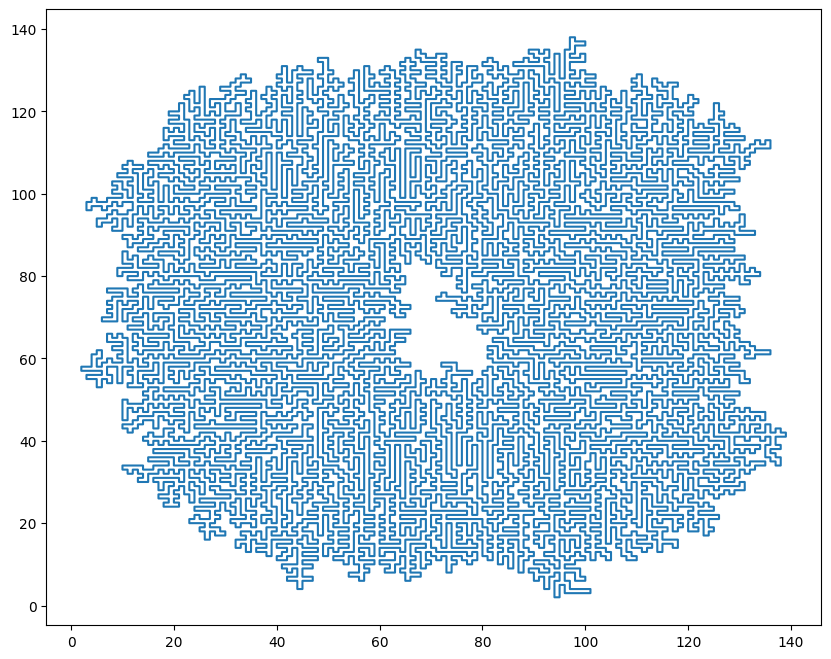

In [ ]:
xs = [x[0] for x in coor_list]
ys = [x[1] for x in coor_list]
plt.figure(figsize=(10,8))
#plt.figsize(10,10)
plt.plot(xs, ys)

In [ ]:
coor_list[:10]

[(62, 111),
 (62, 110),
 (62, 109),
 (62, 108),
 (63, 108),
 (63, 109),
 (63, 110),
 (63, 111),
 (64, 111),
 (64, 110)]